正在计算温度分布，请稍候...
计算完成。
正在生成图像...


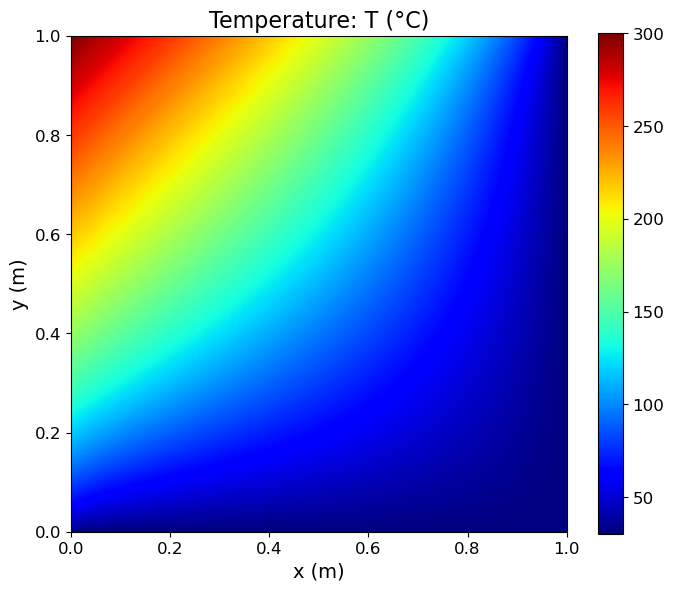

图像已生成。


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. 定义物理常量 (Define Physical Constants) ---
# (Set according to Problem 2 in the homework PDF)
L = 1.0          # 边长 (Side length) [m]
k = 10.0         # 热导率 (Thermal conductivity) [W/(m*K)]
q_s = 2000.0     # 热通量 (Heat flux) [W/m^2]
T_o = 30.0       # 恒定温度 (Constant temperature) [°C]
N = 100          # 级数求和的项数 (Number of terms for series summation)

# --- 2. 定义无量纲温度函数 (Define Dimensionless Temperature Functions) ---

def calculate_theta_1(x, y, n_terms):
    """
    计算 theta_1(x, y) 的值.
    theta_1 对应顶部加热、左侧绝热的工况。
    Calculates the value of theta_1(x, y).
    This corresponds to the case with top heating and left insulation.
    """
    theta_1_val = 0
    for n in range(1, n_terms + 1):
        lambda_n = (2 * n - 1) * np.pi / 2
        
        numerator = 2 * (-1)**(n + 1)
        denominator = lambda_n**2 * np.cosh(lambda_n)
        
        term = numerator / denominator * np.cos(lambda_n * x) * np.sinh(lambda_n * y)
        theta_1_val += term
        
    return theta_1_val

def calculate_theta_2(x, y, n_terms):
    """
    计算 theta_2(x, y) 的值.
    theta_2 对应左侧加热、顶部绝热的工况。
    Calculates the value of theta_2(x, y).
    This corresponds to the case with left heating and top insulation.
    """
    theta_2_val = 0
    for n in range(1, n_terms + 1):
        lambda_n = (2 * n - 1) * np.pi / 2

        numerator = 2
        denominator = lambda_n**2 * np.cosh(lambda_n)

        term = numerator / denominator * np.sinh(lambda_n * (1 - x)) * np.sin(lambda_n * y)
        theta_2_val += term
        
    return theta_2_val

# --- 3. 创建网格并计算温度 (Create Grid and Calculate Temperature) ---

# 创建一个 200x200 的网格
# Create a 200x200 grid
grid_points = 200
x_vals = np.linspace(0, L, grid_points)
y_vals = np.linspace(0, L, grid_points)
X, Y = np.meshgrid(x_vals, y_vals)

# 初始化温度矩阵
# Initialize the temperature matrix
T = np.zeros((grid_points, grid_points))

# 计算无量纲坐标
# Calculate dimensionless coordinates
alpha = X / L
beta = Y / L

# 使用矢量化计算 (更高效)
# Vectorized calculation (more efficient)
print("正在计算温度分布，请稍候...")
theta1_grid = calculate_theta_1(alpha, beta, N)
theta2_grid = calculate_theta_2(alpha, beta, N)

# 叠加并转换为实际温度
# Superposition and conversion to actual temperature
theta_total = theta1_grid + theta2_grid
T = theta_total * (q_s * L / k) + T_o
print("计算完成。")

# --- 4. 绘制温度分布图 (Plot the Temperature Distribution) ---

print("正在生成图像...")
plt.figure(figsize=(8, 6.5))
plt.style.use('default')

# 使用 pcolormesh 或 contourf 来创建填充图
# Use pcolormesh or contourf to create the filled plot
# 使用 'jet' colormap 以匹配参考图像
# Use the 'jet' colormap to match the reference image
contour = plt.pcolormesh(X, Y, T, cmap='jet', shading='gouraud', vmin=30, vmax=300)

# 添加颜色条
# Add a colorbar
cbar = plt.colorbar(contour)
cbar.set_ticks(np.arange(50, 301, 50))
# 更改颜色条刻度标签的字体大小
# Change the font size of the colorbar tick labels
cbar.ax.tick_params(labelsize=12)

# 设置图像标题和轴标签
# Set plot title and axis labels
plt.title('Temperature: T (°C)', fontsize=16)
plt.xlabel('x (m)', fontsize=14)
plt.ylabel('y (m)', fontsize=14)

# 设置坐标轴范围和长宽比
# Set axis limits and aspect ratio
plt.xlim(0, L)
plt.ylim(0, L)
plt.gca().set_aspect('equal', adjustable='box')
# 更改 x 和 y 轴刻度标签的字体大小
# Change the font size of the x and y tick labels
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()
print("图像已生成。")


In [5]:
# 定义 Ti 点的坐标
# Define the coordinates for point Ti
x_i = L / 2.0
y_i = L / 4.0

# 转换为无量纲坐标
# Convert to dimensionless coordinates
alpha_i = x_i / L
beta_i = y_i / L

# 分别计算 theta_1 和 theta_2
# Calculate theta_1 and theta_2 separately
theta1_i = calculate_theta_1(alpha_i, beta_i, N)
theta2_i = calculate_theta_2(alpha_i, beta_i, N)

# 叠加得到总的无量纲温度
# Superpose to get the total dimensionless temperature
theta_i = theta1_i + theta2_i

# 转换为实际温度
# Convert to the actual temperature
T_i = theta_i * (q_s * L / k) + T_o

print("\n--- Ti 计算结果 ---")
print(f"在点 (x={x_i:.2f}, y={y_i:.2f}) 处的温度为:")
print(f"T_i = {T_i:.1f} °C")
print("--------------------")



--- Ti 计算结果 ---
在点 (x=0.50, y=0.25) 处的温度为:
T_i = 71.9 °C
--------------------
